**Necessary Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Read the CSV File**

In [2]:
data = pd.read_csv('boston_housing_prices.csv')

**Prepare the dataset**

In [3]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Linear Regression Neural Network**

In [4]:
class LinearRegressionModel:
    def __init__(self, n_x, n_y, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.parameters = self.initialize_parameters(n_x, n_y)
        
    def initialize_parameters(self, n_x, n_y):
        np.random.seed(42)
        W = np.random.randn(n_y, n_x) * 0.01
        b = np.zeros((n_y, 1))

        parameters = {"W": W, "b": b}
        return parameters

    def forward_propagation(self, X):
        W = self.parameters['W']
        b = self.parameters['b']

        Z = np.dot(W, X) + b
        A = Z  # Linear activation

        cache = {"Z": Z, "A": A}
        return A, cache

    def compute_cost(self, A, Y):
        m = Y.shape[1]
        cost = (1 / (2 * m)) * np.sum(np.square(A - Y))
        return cost

    def backward_propagation(self, cache, X, Y):
        m = X.shape[1]
        W = self.parameters['W']
        A = cache['A']

        dZ = A - Y
        dW = (1 / m) * np.dot(dZ, X.T)
        db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

        grads = {"dW": dW, "db": db}
        return grads

    def update_parameters(self, grads):
        W = self.parameters['W']
        b = self.parameters['b']

        dW = grads['dW']
        db = grads['db']

        W = W - self.learning_rate * dW
        b = b - self.learning_rate * db

        self.parameters = {"W": W, "b": b}

    def model(self, X_train, Y_train, num_iterations=1000):
        for i in range(num_iterations):
            A, cache = self.forward_propagation(X_train)
            cost = self.compute_cost(A, Y_train)
            grads = self.backward_propagation(cache, X_train, Y_train)
            self.update_parameters(grads)

            if i % 100 == 0:
                print(f"Cost after iteration {i}: {cost}")

    def predict(self, X):
        A, _ = self.forward_propagation(X)
        return A


**Train the Neural Network**

In [5]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.to_numpy().reshape(1, -1)
y_test = y_test.to_numpy().reshape(1, -1)

nn_model = LinearRegressionModel(n_x=X_train.shape[0], n_y=1, learning_rate=0.01)

nn_model.model(X_train, y_train, num_iterations=1000)

predictions = nn_model.predict(X_test)

Cost after iteration 0: 303.3570998781638
Cost after iteration 100: 48.09396644500937
Cost after iteration 200: 16.39884386689406
Cost after iteration 300: 12.01784005626979
Cost after iteration 400: 11.321525792047325
Cost after iteration 500: 11.151376926373315
Cost after iteration 600: 11.072934072307849
Cost after iteration 700: 11.021033716208239
Cost after iteration 800: 10.982680483151471
Cost after iteration 900: 10.9533360728785


**Calculate the error**

In [6]:
y_pred = predictions.flatten()
y_true = y_test.flatten()

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 3.2112974007519175
Mean Squared Error (MSE): 25.352269721478866
Root Mean Squared Error (RMSE): 5.035103744857584
R-squared (R²): 0.6542893516613821


**OUTPUT - Plotting the graph**

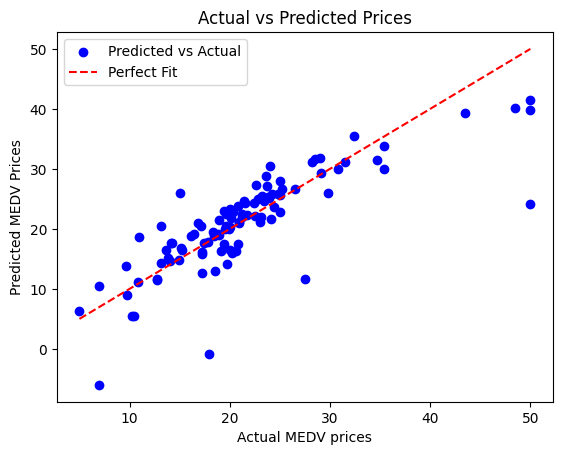

In [7]:
plt.scatter(y_test.flatten(), predictions.flatten(), color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual MEDV prices')
plt.ylabel('Predicted MEDV Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()